In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [4]:
train_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

<Axes: >

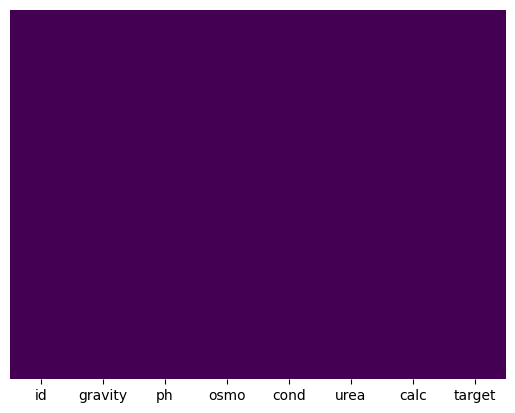

In [5]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
x = train_df.drop(['target','id'],axis = 1)
y =train_df['target']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
rft = RandomForestClassifier()

In [9]:
rft.fit(x,y)

RandomForestClassifier()

In [10]:
predit_rft = rft.predict(x_test)

In [11]:
print(classification_report(y_test,predit_rft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        58

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [12]:
accuracy = accuracy_score(y_test,predit_rft)
print("The accuracy of the Random forest classifier model is:",accuracy*100)

The accuracy of the Random forest classifier model is: 100.0


In [13]:
# 100% Right Prediction useing RandomForestClassifier so i am useing this

In [14]:
print(confusion_matrix(y_test,predit_rft))

[[67  0]
 [ 0 58]]


In [15]:
import pickle

In [16]:
filename = 'Tabular-kidney-stone_Prediction.sav'

In [17]:
pickle.dump(rft,open(filename,'wb'))